# PA(C)E - CONSTRUCT PHASE ...continued

# 1. Decision Trees

**Decision trees are a flowchart-like structure that uses branching paths to predict the outcomes of events, the probability of certain outcomes, or to reach a decision.**

## Types of decision trees in machine learning

1. **Classification trees**: Classification trees determine whether an event happened or didn’t happen. Usually, this involves a “yes” or “no” outcome. For example, how to spend our free time after work or homeownership based on age and income.

2. **Regression trees**: Regression trees, on the other hand, predict continuous values based on previous data or information sources. For example, they can predict the price of gasoline or whether a customer will purchase eggs (including which type of eggs and at which store).


## The structure of a classification tree

A **Decision tree** resembles an upside down tree, because it starts with the root at the top and grows downward so the “leaves” are at the bottom. Decision trees are made of nodes. **Nodes** are groups of samples. There are different types of nodes, depending on how they function in the tree. The first node in a decision tree is called the **root node**. The first split always comes off of the root node, which divides the samples into two new nodes based on the values they contain for a particular feature.
A **child node** is any node that results from a split. The node that the child splits from is known as the **parent node**. Each of these two new child nodes in turn splits the data again, based on a new criterion. This process continues until the nodes stop splitting. The bottom-level nodes that do not split are called **leaf nodes**. All the nodes above the leaf nodes are called **decision nodes**, because they all make a decision that sorts the data either to the left or to the right.

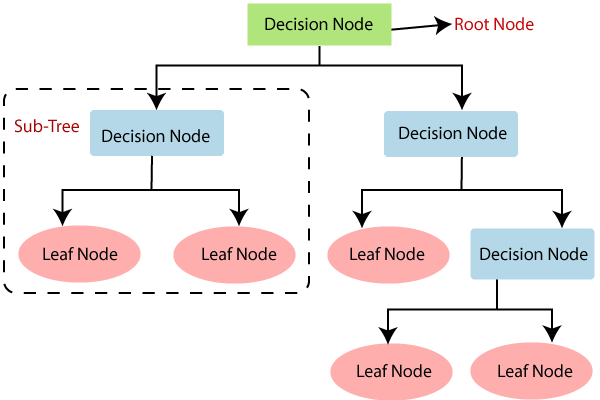

## Decisions and splits

In a decision tree, the data is split and passed down through decision nodes until reaching a leaf node. A decision node is split on the criterion that minimizes the impurity of the classes in their resulting children. **Impurity** refers to the degree of mixture with respect to class. Nodes with low impurity have many more of one class than any other. A perfect split would have no impurity in the resulting child nodes; it would partition the data with each child containing only a single class. The worst possible split would have high impurity in the resulting child nodes; both of the child nodes would have equal numbers of each class.

## Advantages of the Decision Tree

1. It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
2. It can be very useful for solving decision-related problems.
3. It helps to think about all the possible outcomes for a problem.
4. There is less requirement of data cleaning compared to other algorithms.


## Disadvantages of the Decision Tree

1. The decision tree contains lots of layers, which makes it complex.
2. It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
3. For more class labels, the computational complexity of the decision tree may increase.


### Data Pre-processing

In [1]:
# Importing the required packages

# Operation packages
import pandas as pd
import numpy as np

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
sns.set_style('white')

# Machine Learning packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# to display the feature importance chart
from xgboost import plot_importance

# to display the splits of the tree
from sklearn.tree import plot_tree

# to save the models for easy usage
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
df0 = pd.read_csv(r'C:\Users\Dell\Desktop\Projects\Salifort Motors\Datasets\salifort_data_for_modelling.csv')

In [3]:
# showing the first 5 rows
df0.head(5)

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,Sales,Low
1,1,0.80,0.86,5,262,6,0,1,0,Sales,Medium
2,2,0.11,0.88,7,272,4,0,1,0,Sales,Medium
3,3,0.72,0.87,5,223,5,0,1,0,Sales,Low
4,4,0.37,0.52,2,159,3,0,1,0,Sales,Low


In [4]:
# checking the datatypes
df0.dtypes

Unnamed: 0                 int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [5]:
# recalling the balance info between leave and stay
df0['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

<Axes: xlabel='tenure'>

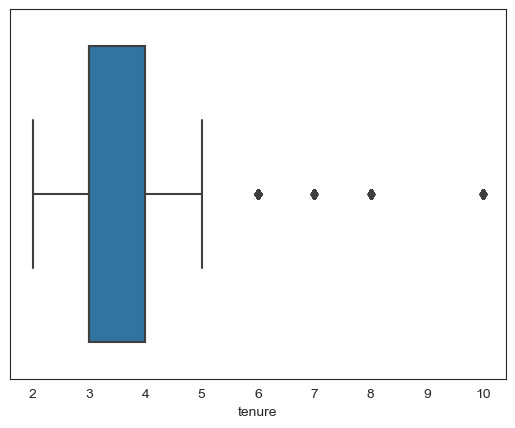

In [6]:
# looking for outliers in 'tenure'
sns.boxplot(data=df0, x='tenure')

In [7]:
# removing the outliers
tenure_iqr = df0['tenure'].quantile(0.75) - df0['tenure'].quantile(0.25)
tenure_upper_limit = df0['tenure'].quantile(0.75) + 1.5 * tenure_iqr
tenure_lower_limit = df0['tenure'].quantile(0.25) - 1.5 * tenure_iqr

# creating a new data frame without the outliers
df0 = df0.loc[(df0['tenure'] < tenure_upper_limit) | (df0['tenure'] > tenure_lower_limit)]

df0.head(6)

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,Sales,Low
1,1,0.80,0.86,5,262,6,0,1,0,Sales,Medium
2,2,0.11,0.88,7,272,4,0,1,0,Sales,Medium
3,3,0.72,0.87,5,223,5,0,1,0,Sales,Low
4,4,0.37,0.52,2,159,3,0,1,0,Sales,Low
5,5,0.41,0.50,2,153,3,0,1,0,Sales,Low


In [8]:
# dummy encode
df = pd.get_dummies(df0, columns = ['department', 'salary'])
df.head()

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_Accounting,...,department_Management,department_Marketing,department_Product Management,department_Research and Development,department_Sales,department_Support,department_Technical,salary_High,salary_Low,salary_Medium
0,0,0.38,0.53,2,157,3,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0.80,0.86,5,262,6,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,0.11,0.88,7,272,4,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,3,0.72,0.87,5,223,5,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,4,0.37,0.52,2,159,3,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


<Axes: >

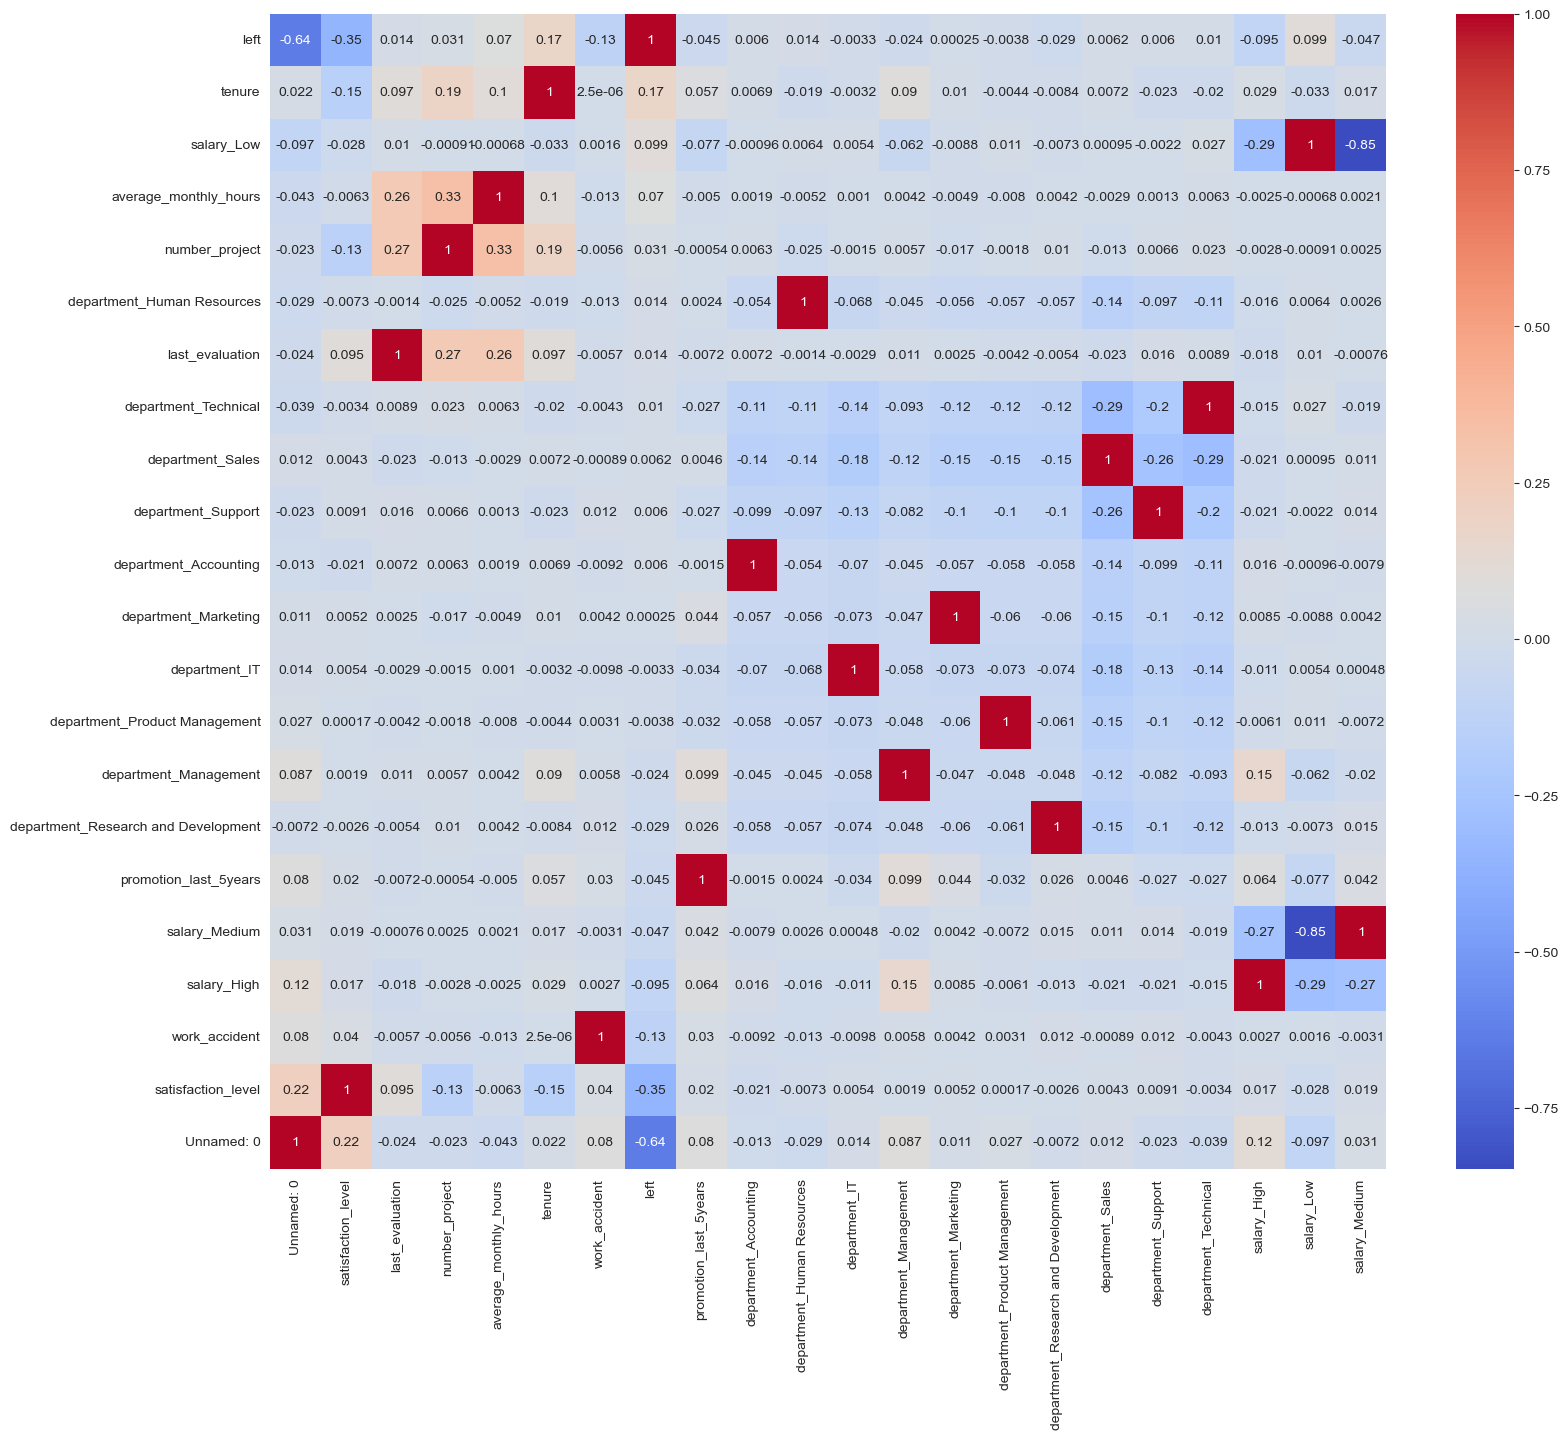

In [9]:
df_corr = df.corr().sort_values(by = 'left', ascending = False)

plt.figure(figsize = (18,15))
sns.heatmap(df_corr, annot=True, cmap = 'coolwarm')

We can see from the heatmap all the variables' correlation strengths with our predictor variable 'left'. 

## 1.1 Single Decision Tree without Grid Search

### Fitting a Decision-Tree algorithm to the Training set

In [10]:
# choosing the only variables
df_model = df.drop(['Unnamed: 0'], axis=1)
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_Accounting,department_Human Resources,...,department_Management,department_Marketing,department_Product Management,department_Research and Development,department_Sales,department_Support,department_Technical,salary_High,salary_Low,salary_Medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [14]:
# splitting the data
y = df_model['left']

X = df_model.copy()
X = X.drop('left', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

In [40]:
# Instantiating the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
dt_model0 = decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = dt_model0.predict(X_test)

### Getting the evaluation scores based on predictions

In [41]:
# Getting the evaluation scores

print('F1 score Decision Tree model: ','%.3f' % f1_score(y_test, dt_pred))
print('Recall score Decision Tree model: ','%.3f' % recall_score(y_test, dt_pred))
print('Precision score Decision Tree model: ','%.3f' % precision_score(y_test, dt_pred))
print('Accuracy score Decision Tree model: ', '%.3f' % accuracy_score(y_test, dt_pred))

F1 score Decision Tree model:  0.902
Recall score Decision Tree model:  0.920
Precision score Decision Tree model:  0.884
Accuracy score Decision Tree model:  0.967


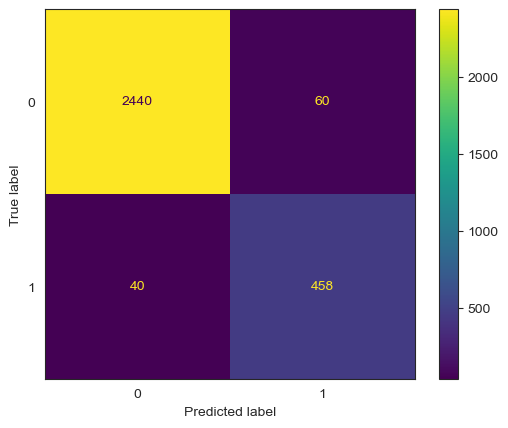

In [43]:
# Plotting a confusion matrix

cm = metrics.confusion_matrix(y_test, dt_pred)  # Use the optimized model
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

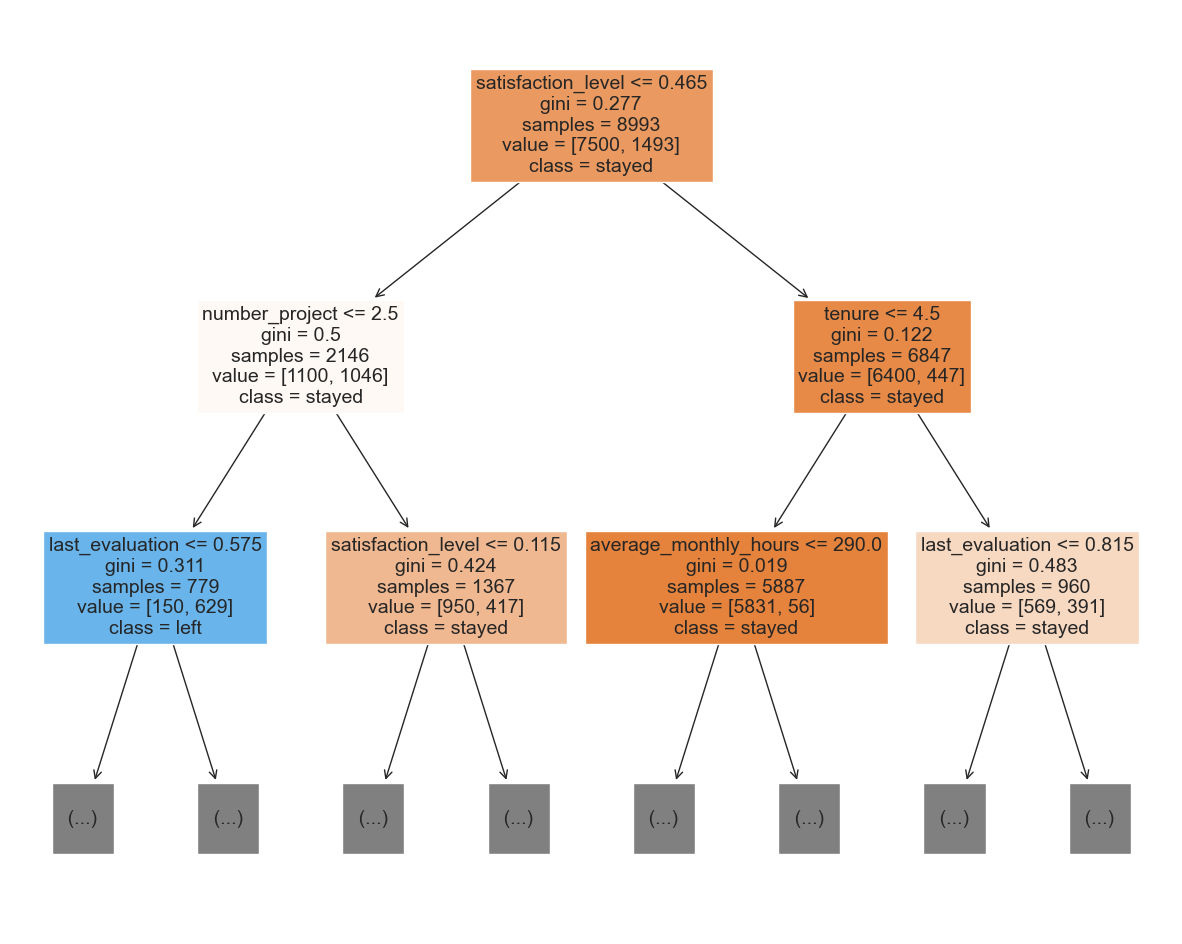

In [29]:
# plotting the tree

plt.figure(figsize=(15,12))
plot_tree(decision_tree,max_depth=2, fontsize=14, feature_names=X.columns, class_names={0:'stayed',1:'left'}, filled=True);
plt.show()

We are most interested in the splits nearest the root because these tell us the most predictive features. Class names displays what the majority class of each node is, and filled colors the nodes according to their majority class. 

The first line of information in each node is the **feature** and split point that the model identified as being the **most predictive**. In other words this is the question that's being asked at that split. For our root node the question was, **is the satisfaction level less than or equal to 0.465?** At each node if the answer to the question it asks is yes, the sample would move to the child node on the left. If the answer is no, the sample would go to the child node on the right.

**Gini** refers to the nodes gini impurity. This is a way of measuring how pure a node is. The value can range from 0 to 0.5. A gini score of zero means there's no impurity. The node is a leaf and all of its samples are of a single class. A score of 0.5 means the classes are all equally represented in that node. 

**Samples** is how many samples are in that node and value indicates how many of each class are in the node. Returning to the root node, we have value equals 7500 and 1493. These numbers sum up to 7500, which is the number of samples in the node. This tells us that 7500 employees in this node stayed and 1,493 employees left. 

Lastly, we have **class**. This tells us the majority class of the samples in each node.

**If we look at the top of the tree, this plot tells us that if we could only do a single split on a single variable, the one that would most help us predict whether a employee will leave is their 'satisfaction_level'. If we look at the nodes at depth one, we notice that the 'project_number' and 'tenure' are also strong predictors of whether or not they will leave.**

## 1.2 Single Decision Tree with Hyperparameter Tuning & Grid Search

### Hyperparameter Tuning and Grid search

**Hyperparameter tuning** involves changing parameters that directly affect how the model trains before the learning process begins.

* **max_depth** defines how long a decision tree can get
* **min_samples_leaf** defines the minimum number of samples for a leaf node
* **min_samples_split** defines the minimum number of samples that a node must have to split into more nodes

**GridSearch** is a tool to confirm that a model achieves its intended purpose by systematically checking every combination of hyperparameters to indentify which set produces the best results, based on the selected metric. Each time a set of hyper parameters is used, it's scored against a validation set, keeping the test data unseen.

### Create a classification model and train (or fit) it with existing data

In [16]:
%%time                             # gives the running-time of the cell 

# Instantiate the model
dt = DecisionTreeClassifier(random_state=0)

# Hyperparameter tuning
cv_params = {'max_depth': [5, 10, 15, 20, 50], 
             'min_samples_leaf': [2,5,10,20,50],
             'min_samples_split': [2,3]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

dt_model = GridSearchCV(dt, cv_params, scoring=scoring, cv=5, refit='f1')

# Fitting the model to training data
dt_model.fit(X_train, y_train)

CPU times: total: 18.6 s
Wall time: 21.2 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15, 20, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50],
                         'min_samples_split': [2, 3]},
             refit='f1', scoring={'accuracy', 'f1', 'precision', 'recall'})

In [19]:
# gives the best estimators of the parameter

dt_model.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=0)

In [20]:
# Checking the parameters of the best-performing model

dt_model.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [21]:
# gives the average f1 score across all the validation folds

print("Best Avg Validation Score: ","%.4f" % dt_model.best_score_)

Best Avg Validation Score:  0.9429


In [22]:
%%time

# apply the best parameters to the model

dt_final_model = DecisionTreeClassifier(max_depth = 10, 
                                min_samples_leaf = 2, min_samples_split = 2,
                                random_state = 0)
dt_final_model.fit(X_train, y_train)

CPU times: total: 62.5 ms
Wall time: 53.3 ms


DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=0)

### Predicting the test result

In [23]:
# Predict on the test set

y_pred_dt = dt_final_model.predict(X_test)

In [25]:
# Getting the 5 evaluation scores

print('F1 score Decision Tree model: ','%.3f' % f1_score(y_test, y_pred_dt))
print('Recall score Decision Tree model: ','%.3f' % recall_score(y_test, y_pred_dt))
print('Precision score Decision Tree model: ','%.3f' % precision_score(y_test, y_pred_dt))
print('Accuracy score Decision Tree model: ', '%.3f' % accuracy_score(y_test, y_pred_dt))

F1 score Decision Tree model:  0.946
Recall score Decision Tree model:  0.932
Precision score Decision Tree model:  0.961
Accuracy score Decision Tree model:  0.982


### Test accuracy of the result (Creation of Confusion matrix)

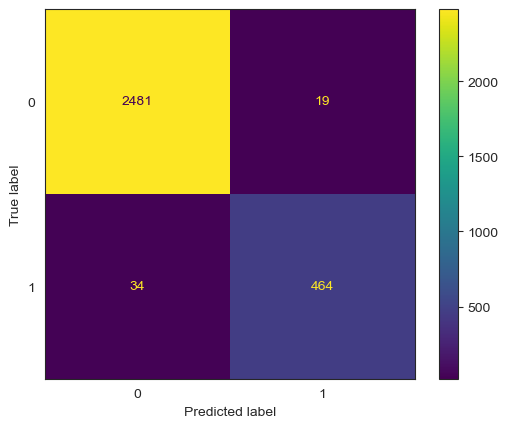

In [26]:
# plotting a confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred_dt, labels = dt_final_model.classes_)  # Use the optimized model
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = dt_final_model.classes_)
disp.plot()

# 2. Random Forest Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

**Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.**

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting. Moreover while decision trees consider all the possible feature splits, random forests only select a subset of those features.

![random forest](https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm.png)

## Assumptions for Random Forest:

1. There should be some actual values in the feature variable of the dataset so that the classifier can predict accurate results rather than a guessed result.
2. The predictions from each tree must have very low correlations.

## Advantages of Random Forest

1. Random Forest is capable of performing both Classification and Regression tasks.
2. It is capable of handling large datasets with high dimensionality.
3. It enhances the accuracy of the model and prevents the overfitting issue.

## Disadvantages of Random Forest

1. Although random forest can be used for both classification and regression tasks, it is not more suitable for Regression tasks.

### Hyperparamaters for Random Forest:

1. **max_depth**: It governs the maximum height upto which the trees inside the forest can grow.

2. **max_features**: Random forest takes random subsets of features and tries to find the best split.  max_features helps to find the number of features to take into account in order to make the best split.

3. **max_samples**: This hyperparameter helps to choose maximum number of samples from the training dataset to train each individual tree.

4. **min_samples_split**: It specifies the minimum amount of samples an internal node must hold in order to split into further nodes. 

5. **min_samples_leaf**:  It specifies the minimum amount of samples that a node must hold after getting split.

6. **n_estimator** parameter controls the number of trees inside the classifier. 

### Create a classification model and train (or fit) it with existing data

In [31]:
%%time

# Instantiating the classifier
rf = RandomForestClassifier(random_state=0)

# Hyperparameter tuning
cv_params={'max_depth' : [5,7,10],
           'max_features' : [2,5,10],
           'max_samples' : [0.7],
           'min_samples_leaf': [5,10,20,50,100],
           'min_samples_split' : [2,5,10],
           'n_estimators' : [50,100]
}

scoring = {'accuracy','precision','recall','f1'}

rf_model = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5, refit = 'f1')

# Fitting the model to training data
rf_model.fit(X_train, y_train)

CPU times: total: 16min 56s
Wall time: 19min 22s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [2, 5, 10],
                         'max_samples': [0.7],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             refit='f1', scoring={'accuracy', 'f1', 'precision', 'recall'})

In [ ]:
# pickle helps us access the tuned model without rerunning the cell above or tuning everytime we run the program
# just comment out the previous cell before running the entire program
# creating a path to save the model for pickle to use
path = 'C:/Users/Dell/Desktop/Projects/Salifort Motors/'

In [ ]:
# pickle the model
with open(path + 'rf_cv_model_p.pickle','wb') as to_write:
    pickle.dump(rf_cv, to_write)

In [ ]:
# open pickled model
with open(path + 'rf_cv_model_p.pickle','rb') as to_read:
    rf_cv = pickle.load(to_read)

In [32]:
# Checking the parameters of the best-performing model

rf_model.best_params_

{'max_depth': 10,
 'max_features': 5,
 'max_samples': 0.7,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [33]:
# Checking the best average f1 score

print("Best Avg Validation Score: ","%.4f" % rf_model.best_score_)

Best Avg Validation Score:  0.9381


In [34]:
%%time

# applying the best parameters to the model

rf_final_model = RandomForestClassifier(n_estimators = 100, max_depth = 10, 
                                min_samples_leaf = 5, min_samples_split = 2,
                                max_features=5, max_samples = 0.7, random_state = 0)

# fitting the training data into the model
rf_final_model.fit(X_train, y_train)

CPU times: total: 1.25 s
Wall time: 1.27 s


RandomForestClassifier(max_depth=10, max_features=5, max_samples=0.7,
                       min_samples_leaf=5, random_state=0)

### Predicting the test result

In [35]:
# predict on test data set

y_pred_rf = rf_final_model.predict(X_test)

In [36]:
# Get 5 evaluation scores.

print('F1 score Random Forest model: ','%.3f' % f1_score(y_test, y_pred_rf))
print('Recall score Random Forest model: ','%.3f' % recall_score(y_test, y_pred_rf))
print('Precision score Random Forest model: ','%.3f' % precision_score(y_test, y_pred_rf))
print('Accuracy score Random Forest model: ','%.3f' % accuracy_score(y_test, y_pred_rf))

F1 score Random Forest model:  0.950
Recall score Random Forest model:  0.916
Precision score Random Forest model:  0.987
Accuracy score Random Forest model:  0.984


### Test accuracy of the result (Creation of Confusion matrix)

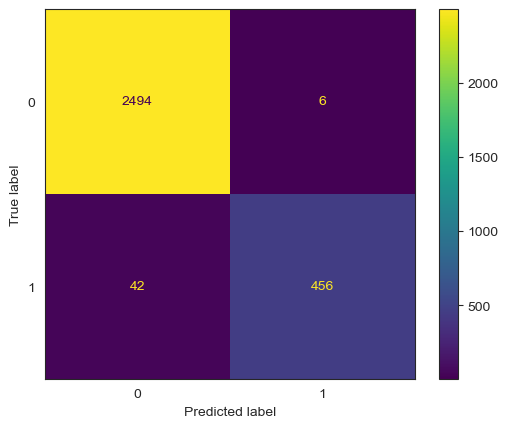

In [38]:
# plotting a confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred_rf, labels = rf_final_model.classes_)  # Use the optimized model
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_final_model.classes_)
disp.plot()

# 3. XGBoost

### Hyperparamaters for XGBoost:

1. **max_depth** : It governs the maximum height upto which the trees inside the forest can grow.

2. **min_child_weight** : Minimum sum of instance weight (hessian) needed in a child.

3. **learning_rate/eta** : Step size shrinkage used in update to prevents overfitting.  

4. **n_estimator** : parameter controls the number of trees inside the classifier. 

5. **Subsample** : ratio of the training instances.

6. **colsample_bytree** : the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

### Create a classification model and train (or fit) it with existing data

In [44]:
%%time
# instantiating the model
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Choose the hyperparameters
cv_params = {'max_depth': [7, 9],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.01],
              'n_estimators': [100],
              'subsample': [1.0],
              'colsample_bytree': [1.0]
              }
scoring = {'accuracy', 'precision', 'recall', 'f1'}   

xgb_model = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

xgb_model.fit(X_train, y_train)

CPU times: total: 1min 40s
Wall time: 35.7 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [1.0],
                         'learning_rate': [0.1, 0.01], 'max_depth': [7, 9],
                         'min_child_weight': [3, 5], 'n_estimators': [100],
                         'subsample': [1.0]},
             refit='f1', scoring={'accuracy', 'f1', 'precision', 'recall'})

In [45]:
#Check the parameters of the best-performing model
xgb_model.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 1.0}

In [46]:
# Check the best avg f1 score
print("Best Avg Validation Score: ","%.4f" %xgb_model.best_score_)

Best Avg Validation Score:  0.9474


In [50]:
%%time
# apply the best parameters into the model

xgb_final_model = XGBClassifier(colsample_bytree= 1.0,learning_rate= 0.1,
                                         max_depth= 7,min_child_weight= 3,
                                         n_estimators= 100,subsample= 1.0, random_state = 0)
xgb_final_model.fit(X_train, y_train)

CPU times: total: 4.23 s
Wall time: 1.12 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

### Predicting the test result

In [51]:
# predict on test data set
y_pred_xgb = xgb_final_model.predict(X_test)

In [53]:
# Get 5 evaluation scores.

print('F1 score XGB model: ','%.3f' % f1_score(y_test, y_pred_xgb))
print('Recall score XGB model: ', '%.3f' % recall_score(y_test, y_pred_xgb))
print('Precision score XGB model: ','%.3f' % precision_score(y_test, y_pred_xgb))
print('Accuracy score XGB model: ','%.3f' % accuracy_score(y_test, y_pred_xgb))

F1 score XGB model:  0.953
Recall score XGB model:  0.928
Precision score XGB model:  0.979
Accuracy score XGB model:  0.985


### Test accuracy of the result (Creation of Confusion matrix)

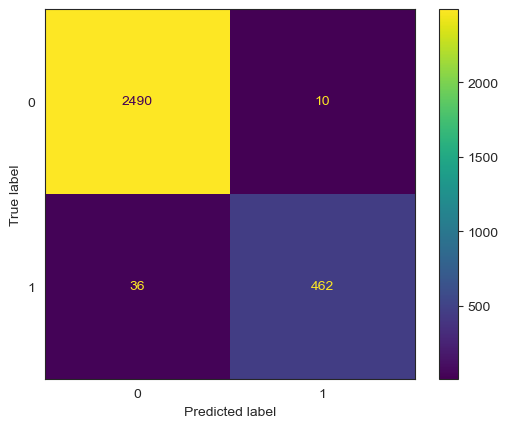

In [54]:
# plotting a confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred_xgb, labels = xgb_final_model.classes_)  # Use the optimized model
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = xgb_final_model.classes_)
disp.plot()

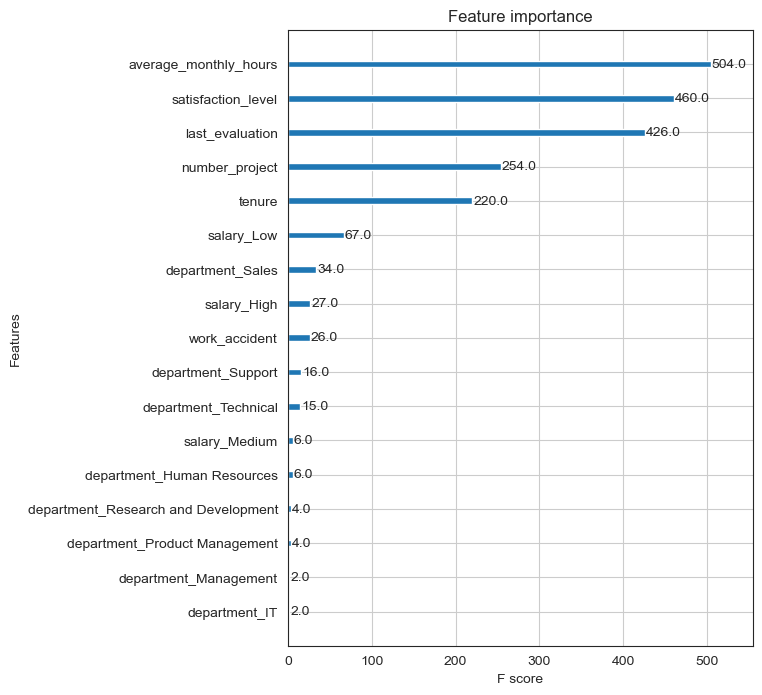

In [61]:
# plotting a bar chart with features 
plot_importance(xgb_final_model)
plt.show()

## List of References:
1. Decision Tree
   * [Decision Learning Model Learning](https://www.coursera.org/articles/decision-tree-machine-learning)
   * [Machine Learning decision tree classification algorithm](https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm)
2. Random Forest Classifier
   * [Machine Learning Random Forest classification algorithm](https://www.javatpoint.com/machine-learning-random-forest-algorithm)
   * [StatQuest: Random Forests Part 1 - Building, Using and Evaluating](https://youtu.be/J4Wdy0Wc_xQ?si=S0u2sWWOTNjOcjRC)
   * [StatQuest: Bootstrapping Main Ideas!!!](https://youtu.be/Xz0x-8-cgaQ?si=pqVVwhfUYOQ8-jQ6)
   * [Ensembles - Kaggle Notebook](https://www.kaggle.com/code/kashnitsky/topic-5-ensembles-part-1-bagging/notebook)
   
3. XGBoost
   * [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)